<a href="https://colab.research.google.com/github/onsoon829/dataproject/blob/master/604_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_Model_Selection_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%ED%95%A0(hold_out).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## hold_out

 1.  hold-out은 데이터셋을 Train, Test 셋으로 분리한다. 머신러닝 등 분석 방법에 따라서는  Train, Validation, Test 셋으로 분리하기도 한다.
 - Train Dataset: 모델을 학습시킬 때 사용할 데이터셋


 - Validation Dataset: Train Dataset으로 학습한 모델의 성능을 측정하기 위한 데이터셋


 - Test Dataset: 모델의 성능을 최종적으로 측정하기 위한 데이터셋으로, 마지막에 모델의 성능을 측정하는 용도로 딱 한 번만 사용됨  


2. hold-out 데이터 분할은 scikit-learn의 train_test_split()함수를 사용한다.
  X_train, X_test, y_train, y_test = train_test_split(arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)  
  X : 독립변수 데이터  
  Y : 종속변수 데이터  
  test_size : 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 준다.  default 값은 0.25 이다.

 random_state : 데이터셋을 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있다.

  shuffle : default=True 이며 보통은 default 값을 사용한다. split을 해주기 이전에 섞을건지 여부이다. 데이터를 섞는 것이다. 할지 말지 정한다.

  stratify : default=None으로 분류(classification)을 다룰때 매우 중요한 옵션값으로 층화임의추출 여부를 결정한다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 준다. (한 쪽에 쏠려서 분배되는 것을 방지한다.) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있다. 나누는 비율을 설정.ㅋ.


3. Hold out 방식의 단점
- train/test 셋이 어떻게 나눠지냐에 따라 결과가 달라져서, 데이터가 수천건 정도로 적을 때는 문제가 발생할 수 있다.  


* 데이터셋의 양이 적을 경우 학습을 위한 데이터 양이 너무 적어 학습이 제대로 안 될 수 있으며, 다양한 패턴을 찾을 수 없기 때문에


새로운 데이터에 대한 예측 성능이 떨어진다. 이에 Hold out 방식은 다양한 패턴을 가진 데이터의 양이 많을 경우에 사용한다.




In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
data = load_breast_cancer()

In [ ]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_target = pd.DataFrame(data.target, columns=['target'])
data_target.sample(5)


,target
324,1
390,1
195,1
82,0
164,0


In [ ]:
breast_cancer=pd.concat([data_pd, data_target], axis=1)
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# column이 많을 때 DataFrameㅇㄹ 전치(T)하여 한번에 보면 좋다.
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: >

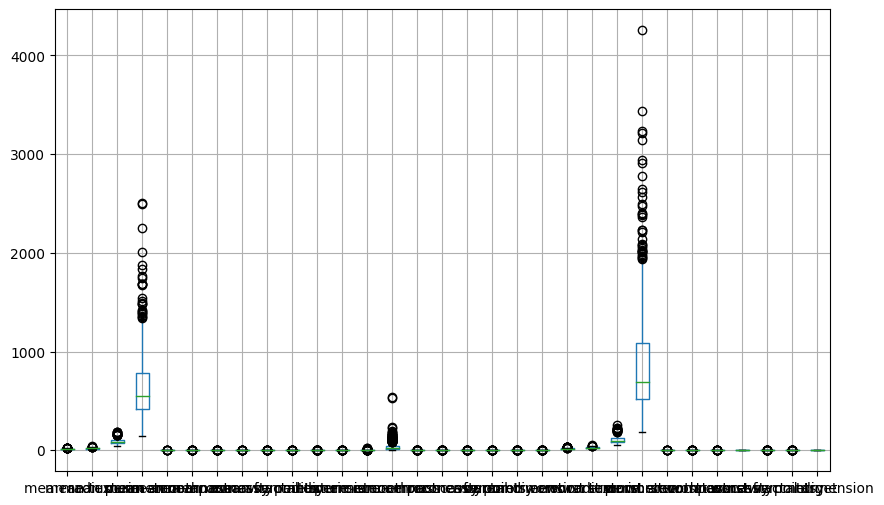

In [ ]:
breast_cancer.boxplot(figsize=(10,6))

### holdout: 학습/테스트 데이터 분리

In [ ]:
# 중복값이 있는지 확인: dublicated
breast_cancer[breast_cancer.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(breast_cancer)

[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 299        10.51         23.09           66.85      334.2          0.10150   
 343        19.68         21.68          129.90     1194.0          0.09797   
 547        10.26         16.58           65.85      320.8          0.08877   
 131        15.46         19.48          101.70      748.9          0.10920   
 369        22.01         21.90          147.20     1482.0          0.10630   
 ..           ...           ...             ...        ...              ...   
 269        10.71         20.39           69.50      344.9          0.10820   
 145        11.90         14.65           78.11      432.8          0.11520   
 559        11.51         23.93           74.52      403.5          0.09261   
 392        15.49         19.97          102.40      744.7          0.11600   
 239        17.46         39.28          113.40      920.6          0.09812   
 
      mean compactness  mean concavity  mean conca

In [ ]:
# output이 여러개인 경우 len을 해본다.
# train과 test값을 75대25로 나눠준다.
len(train_test_split(breast_cancer))

2

In [ ]:
# shuffle=True일 경우 매번 실행할 때마다 결과가 다르다.
# 기본은 shuffle=True이다.
x, y =train_test_split(breast_cancer, shuffle=False)

In [ ]:
# random_state는 random seed를 지정한다.
#computer는 random seed를 기준으로 난수를 생성한다. (진정한 무작위는 불가능)
# random_state가 같으면 결과가 항상 같다.
X,y = train_test_split(breast_cancer, random_state=42)

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,1
512,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,1
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,0
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,1
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,0


In [ ]:
# array를 1개 넣으면 값이 2개 변환 (X_train, X_test)
# array를 2개 넣으면 값이 4개 변환 (X_train, X_test, y_train, y_test)
len(train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target))

4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target)

In [ ]:
# 만약 train에 정답이 없고 test에만 정답이 모두 들어가도록 조개지는 경우는 학습이 아노디는 문제가 발생할 수 있다.
# rnadom때문에 우연히 나눠질 수도 있다.

#ex) 0이 모두 train set에 포함되어 있고, test set에는 0이 없으면 0은 예측할 수 없을 것이다.
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
# stratify는 데이터의 비율이 동일하게 나누는 옵션이다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target, stratify=breast_cancer.target)

In [ ]:
# 적절하게 쪼개졌는지 확인한다.
print(y_test.value_counts())

1    90
0    53
Name: target, dtype: int64


In [ ]:
# 적절하게 쪼개졌는지 확인한다. 흐음 데이터 정렬의 한 방법?
print(y_train.value_counts())

1    267
0    159
Name: target, dtype: int64


## 기계학습

In [ ]:
# sklearn에서 일반적으로 알고리즘명이 분류는 Classificaiton으로 끝나고, 회귀는 Regression으로 끝난다.
# LogisticRegression은 이름은 Regression이지만 실제로는 분류 알고리즘이다.
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train) #훈련할 데이터와 함께 정답도 넣어준다? (학습데이터, 정답데이터)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
# 맞췄는지 비교해 본다.
lr.predict(X_test) == y_test

176     True
234     True
172     True
48      True
516     True
       ...  
246     True
194    False
326     True
98      True
151     True
Name: target, Length: 143, dtype: bool

In [ ]:
# 정확도는 구한다.
sum(lr.predict(X_test) == y_test)/len(y_test)

0.9440559440559441

In [ ]:
# stratify: 균등하게
# 처음부터 다시 실행한 결과가 다르다.
# train_test_split이 random하게 학습데이터를 나누기 때문이다.
# 같은 모델이어도 학습할 때마다 편차가 생긴다.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.iloc[:,:-1], breast_cancer.target, stratify=breast_cancer.target)

lr = LogisticRegression()
lr.fit(X_train, y_train)
sum(lr.predict(X_test)==y_test / len(y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


48

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
# 리스트 4-2-(2)
import numpy as np
import matplotlib.pyplot as plt
def f(w0, w1): # (A) f의 정의
  return w0**2 + 2 * w0 * w0 * w1 + 3
def df_dw0(w0, w1): # (B) f의 w0에 관한 편미분
  return 2 * w0